In [20]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("german_credit_data_biased_training.csv")
df

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,...,savings_insurance,40,none,own,1,skilled,1,none,yes,No Risk
4996,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,...,car_other,32,bank,own,1,unemployed,1,none,yes,No Risk
4997,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,...,unknown,54,stores,own,2,unskilled,2,yes,yes,Risk
4998,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,...,savings_insurance,27,stores,own,1,skilled,1,none,yes,Risk


In [3]:
df.head() #outpit the first five row 

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [4]:
df.info() ##to check the overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5000 non-null   object
 1   LoanDuration              5000 non-null   int64 
 2   CreditHistory             5000 non-null   object
 3   LoanPurpose               5000 non-null   object
 4   LoanAmount                5000 non-null   int64 
 5   ExistingSavings           5000 non-null   object
 6   EmploymentDuration        5000 non-null   object
 7   InstallmentPercent        5000 non-null   int64 
 8   Sex                       5000 non-null   object
 9   OthersOnLoan              5000 non-null   object
 10  CurrentResidenceDuration  5000 non-null   int64 
 11  OwnsProperty              5000 non-null   object
 12  Age                       5000 non-null   int64 
 13  InstallmentPlans          5000 non-null   object
 14  Housing                 

The above shows that we dont have any null value in this dataset 

In [6]:
df.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.393000,3480.145000,2.982400,2.854200,35.932400,1.465800,1.164600
std,11.162843,2488.232783,1.127096,1.115702,10.648536,0.565415,0.370856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,13.000000,1326.750000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3238.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,29.000000,5355.000000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


Calculating the mean median , mode and standard deviation of the numerical columns 

In [8]:
num = df.select_dtypes(include=['number'])

# Basic statistics
means = num.mean()
medians = num.median()
modes = num.mode()          
stds = num.std(ddof=1)      

print("Means:\n", means)
print("\nMedians:\n", medians)
print("\nModes:\n", modes)    
print("\nStandard deviations:\n", stds)

corr_matrix = num.corr()
print("\nCorrelation matrix:\n", corr_matrix)

Means:
 LoanDuration                  21.3930
LoanAmount                  3480.1450
InstallmentPercent             2.9824
CurrentResidenceDuration       2.8542
Age                           35.9324
ExistingCreditsCount           1.4658
Dependents                     1.1646
dtype: float64

Medians:
 LoanDuration                  21.0
LoanAmount                  3238.5
InstallmentPercent             3.0
CurrentResidenceDuration       3.0
Age                           36.0
ExistingCreditsCount           1.0
Dependents                     1.0
dtype: float64

Modes:
    LoanDuration  LoanAmount  InstallmentPercent  CurrentResidenceDuration  \
0             4         250                   3                         3   

   Age  ExistingCreditsCount  Dependents  
0   19                     1           1  

Standard deviations:
 LoanDuration                  11.162843
LoanAmount                  2488.232783
InstallmentPercent             1.127096
CurrentResidenceDuration       1.115702
Age    

## Creating visualization using matplotlib and seaborn 

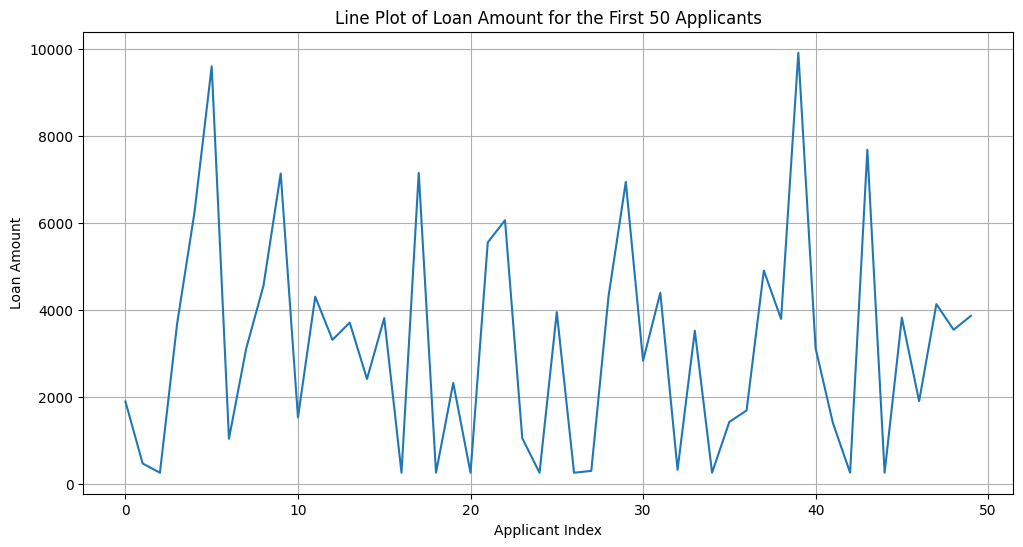

In [14]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Basic line plot 
# To make the line plot clear, we'll just plot the first 50 entries.
plt.figure(figsize=(12, 6))
plt.plot(df['LoanAmount'].head(50))
plt.title('Line Plot of Loan Amount for the First 50 Applicants')
plt.xlabel('Applicant Index')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

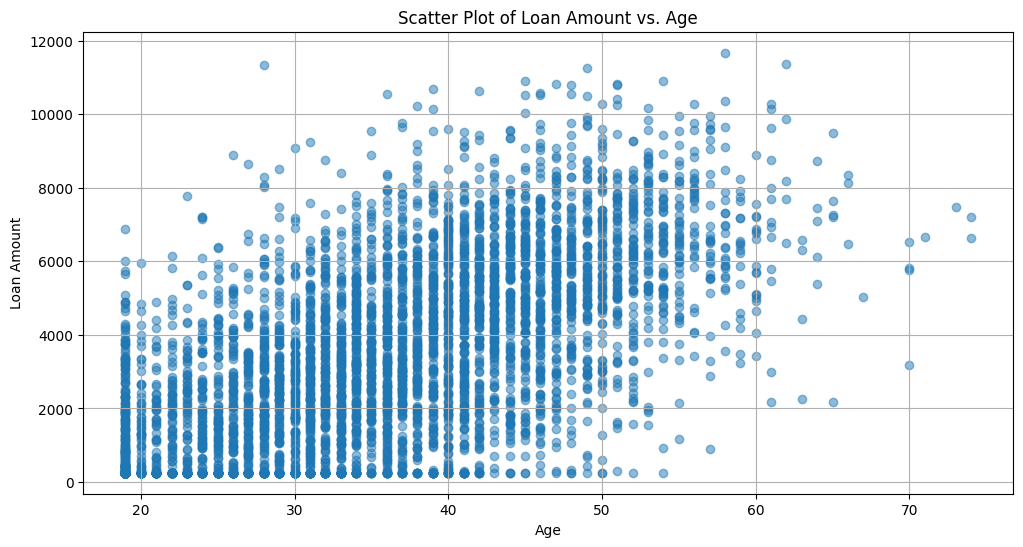

In [16]:
# Basic scatter plot 
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['LoanAmount'], alpha=0.5)
plt.title('Scatter Plot of Loan Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

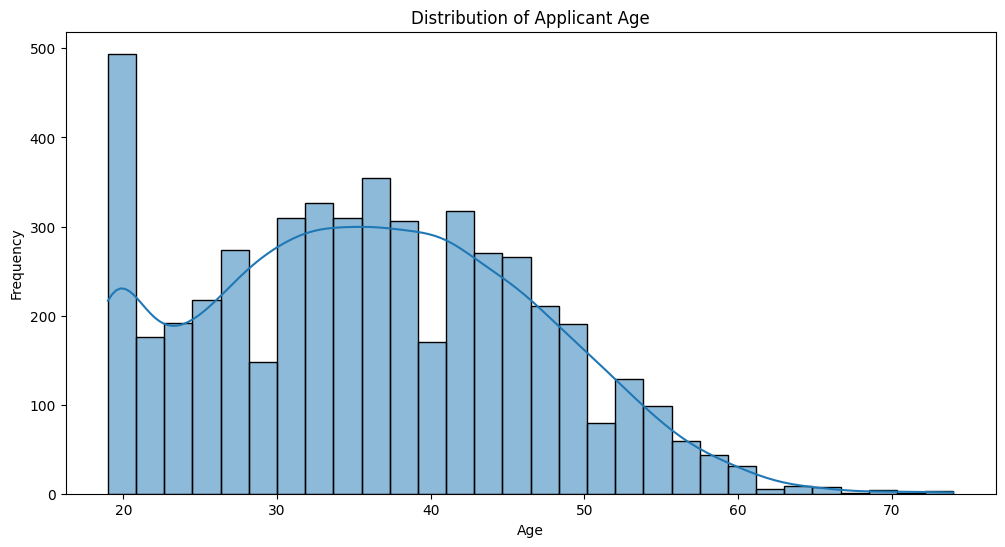

In [24]:
# Histogram 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title('Distribution of Applicant Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

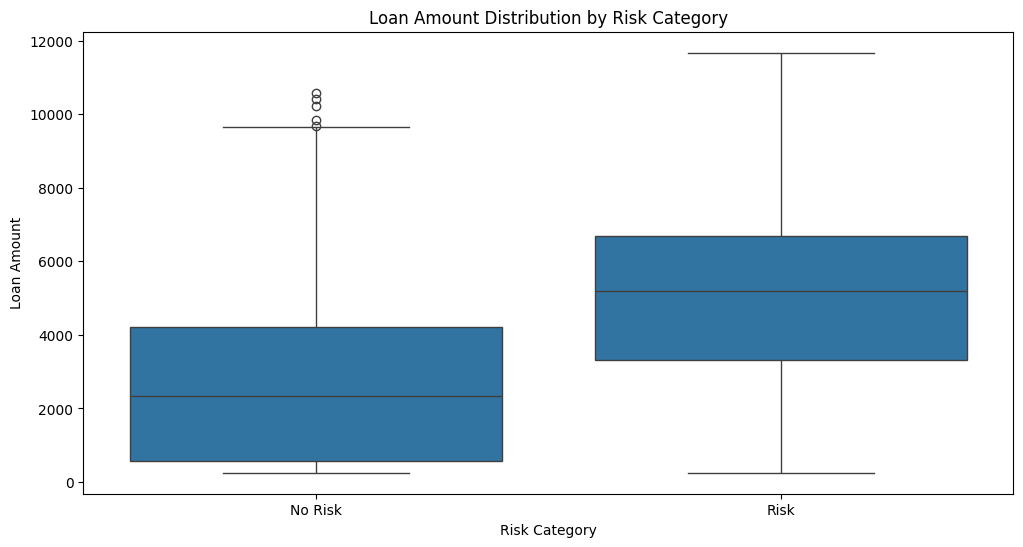

In [26]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Risk', y='LoanAmount')
plt.title('Loan Amount Distribution by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Loan Amount')
plt.show()